In [300]:
import math
import numpy as np
import matplotlib.pyplot as plt


In [301]:
#Defining the 2 distributions
# Create a 2D array with 100 rows and 2 columns
np.random.seed(12)
data1 = np.random.normal(loc=(1, -1), scale=1, size=(20, 2))
#add the augment column as the first column to the data
augment = np.ones((20, 1))
augment_1 = np.hstack((augment, data1))
# Create a 2D array with 100 rows and 2 columns
data2 = np.random.normal(loc=(1, 1), scale=1, size=(20, 2))
#add the augment column as the first column to the data
augment = np.ones((20, 1))
augment_2 = np.hstack((augment, data2))
print("Dataset 1:\n", data1)
print("\nDataset 2:\n", data2)


Dataset 1:
 [[ 1.47298583e+00 -1.68142588e+00]
 [ 1.24243950e+00 -2.70073563e+00]
 [ 1.75314283e+00 -2.53472134e+00]
 [ 1.00512708e+00 -1.12022767e+00]
 [ 1.93018121e-01  1.87181939e+00]
 [ 4.02177081e-01 -5.27543006e-01]
 [ 2.09595612e+00 -2.21516880e+00]
 [ 2.34235637e+00 -1.12214979e+00]
 [ 2.01251548e+00 -1.91386915e+00]
 [-2.95302074e-02  2.09796450e-01]
 [ 1.50187230e+00 -8.61153823e-01]
 [ 1.64076111e+00 -4.72667335e-01]
 [-1.54360235e-01 -3.21333348e+00]
 [-6.81756510e-01 -2.78809425e+00]
 [-1.21853495e+00 -1.64743078e+00]
 [ 4.71595679e-01 -1.03920917e+00]
 [ 1.21497595e+00 -1.38435880e+00]
 [ 7.46095922e-01 -9.26747925e-01]
 [ 2.79616258e-03 -1.71385629e+00]
 [ 1.03541635e+00 -1.67794537e+00]]

Dataset 2:
 [[ 0.42811894  0.89413768]
 [ 2.33583134  1.31866529]
 [ 0.66240475  0.41473172]
 [ 0.88508006  3.24181779]
 [-2.14741652  1.53513589]
 [ 1.23249044  1.86761195]
 [-0.14821271  3.11434424]
 [ 2.00094276  0.948585  ]
 [ 1.1597877   0.28373641]
 [ 1.05052283  0.85666259]
 [ 1

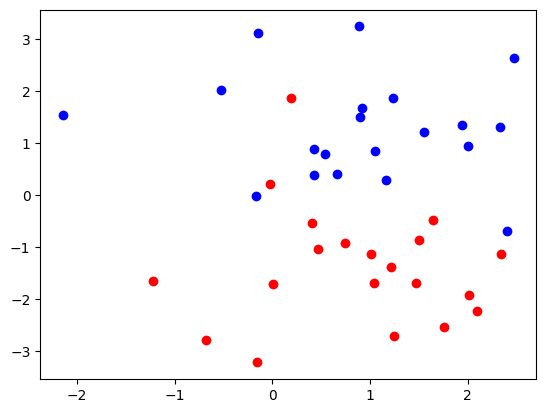

In [302]:
#Plot the 2 distributions
plt.scatter(data1[:, 0], data1[:, 1], color='red')# this will plot the first column of data1 on the x-axis and the second column on the y-axis
plt.scatter(data2[:, 0], data2[:, 1], color='blue')# this will plot the first column of data2 on the x-axis and the second column on the y-axis
plt.show()


In [303]:
theta0 = np.random.uniform(-0.5, 0.5)
theta1 = np.random.uniform(-0.5, 0.5)
theta2 = np.random.uniform(-0.5, 0.5)
theta_weights = np.array([theta0, theta1, theta2])
print(f"The inital random weights are : {theta_weights}")
print(f"The shape of the weights is : {theta_weights.shape}")

The inital random weights are : [-0.12255922 -0.09715279  0.38517769]
The shape of the weights is : (3,)


In [304]:
#function used to plot the decision boundary
def decision_boundary(theta_weights, data1, data2):
    x = np.linspace(-2.5, 2.5, 2)
    y = (-theta_weights[0] - theta_weights[1]*x) / theta_weights[2]
    plt.plot(x, y, color='black')
    plt.scatter(data1[:, 0], data1[:, 1], color='red')
    plt.scatter(data2[:, 0], data2[:, 1], color='blue')
    plt.legend(['Decision Boundary', 'Dataset 1', 'Dataset 2'])
    plt.show()

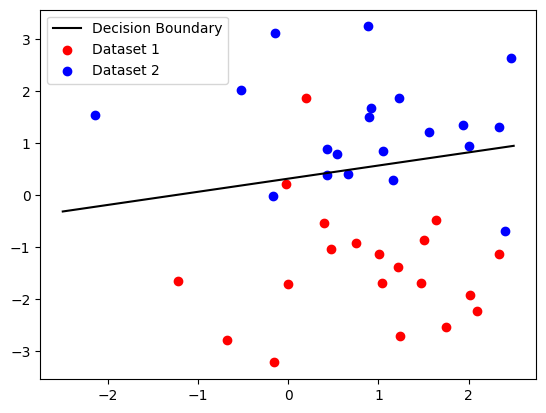

In [305]:
#Plotting the parameters as a line
decision_boundary(theta_weights, data1, data2)


In [306]:
#Definig the sigmoid function to be used in the logistic regression and to find h_theta(x)
def sigmoid (z):
    return 1 / (1 + np.exp(-z))

print(f"phi(0)={sigmoid(0)}")
print(f"phi'(0)={sigmoid(0)}")



phi(0)=0.5
phi'(0)=0.5


In [307]:
#cost function h_theta(x)
def h_theta(theta_weights, x):
    theta_weights = np.transpose(theta_weights)
    return sigmoid(np.dot(theta_weights.T, x))




In [308]:
#Hence the likelihood function is given by
def likelihood (theta_weights,data):
    sum = 0
    for point in data:
        sum += point[1]*math.log(h_theta(theta_weights, point)) + (1-point[1])*math.log(1-h_theta(theta_weights, point))
    return -sum
# print("Shape of theta_weights:",theta_weights.shape)

print(f"Since the E(theta)= -l(theta) we have l(theta) for dataset 1 is= {likelihood(theta_weights, augment_1)}")
print(f"Since the E(theta)= -l(theta) we have l(theta) for dataset 2 is= {likelihood(theta_weights, augment_2)}")
#combine the two datasets
augment_data = np.vstack((augment_1, augment_2))
print(f"The log likelihood of the model is for the combined dataset is: {likelihood(theta_weights, augment_data)}")

Since the E(theta)= -l(theta) we have l(theta) for dataset 1 is= 22.998755288715184
Since the E(theta)= -l(theta) we have l(theta) for dataset 2 is= 15.58448672073164
The log likelihood of the model is for the combined dataset is: 38.58324200944683


In [309]:
#Cost function with regularization
def cost_func_regul(theta_weights, data, lamda):
    sum = 0 
    #regularization term sum
    sum_reg = 0
    for i in range(1, len(theta_weights)):
        sum_reg += theta_weights[i]**2

    for point in data:
        sum += point[1]*math.log(h_theta(theta_weights, point)) + (1-point[1])*math.log(1-h_theta(theta_weights, point)) 
    return (-sum)+(lamda*sum_reg)

print(f"The cost function with regularization for dataset 1 is: {cost_func_regul(theta_weights, augment_1, 0.005)}")
print(f"The cost function with regularization for dataset 2 is: {cost_func_regul(theta_weights, augment_2, 0.005)}")
print(f"The cost function with regularization for the combined dataset is: {cost_func_regul(theta_weights, augment_data, 0.005)}")


The cost function with regularization for dataset 1 is: 22.999544291319484
The cost function with regularization for dataset 2 is: 15.585275723335938
The cost function with regularization for the combined dataset is: 38.58403101205113


In [314]:
#doing gradiant descent to find the optimal weights
def gradient_descent_single(theta_weights, data, learning_rate):
    theta0 = theta_weights[0]
    theta1 = theta_weights[1]
    theta2 = theta_weights[2]
    theta0_new = 0
    theta1_new = 0
    theta2_new = 0
    iter0 = 0
    iter1 = 0
    iter2 = 0
    #since we are doing gradient descent we need to update the weights for theta0 differently
    while iter0 < 1000:    
        for point in data:
            theta0_new  = theta0 - learning_rate*(h_theta(theta0, point) - point)
            theta0 = theta0_new
            iter0 += 1
    
    while iter1 < 1000:
        for point in data:
            theta1_new  = theta1 - learning_rate*(h_theta(theta1, point) - point)
            theta1 = theta1_new
            iter1 += 1

    while iter2 < 1000:
        for point in data:
            theta2_new  = theta2 - learning_rate*(h_theta(theta2, point) - point)
            theta2 = theta2_new
            iter2 += 1


    return theta0_new, theta1_new, theta2_new

print(f"The optimal theta0 for dataset 1 is: {gradient_descent_single(theta_weights, augment_1, 0.01)}")


The optimal theta0 for dataset 1 is: (array([  0.9929203 ,  -0.48241062, -22.73741041]), array([  1.01342454,  -0.461936  , -22.71673695]), array([  1.41020385,  -0.06570149, -22.31679146]))
